# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
count = 1
sets = 1
weather_df = pd.DataFrame({"City": cities})
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lon"] = ""
weather_df["Max Temp"] = ""
# weather_df["Min Temp"] = ""
weather_df["Wind Speed"] = ""
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in weather_df.iterrows():
    city = row["City"]
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:
        print(f"Processing Record {count}  of Set {sets} | {city}.")
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lon"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
#      weather_df.loc[index, "Min Temp"] = response["main"]["temp_min"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    except:
        print("City not found...skipping.")
        weather_df.loc[index, "Cloudiness"] = ""
        weather_df.loc[index, "Country"] = ""
        weather_df.loc[index, "Date"] = ""
        weather_df.loc[index, "Humidity"] = ""
        weather_df.loc[index, "Lat"] = ""
        weather_df.loc[index, "Lon"] = ""
        weather_df.loc[index, "Max Temp"] = ""
        weather_df.loc[index, "Wind Speed"] = ""
    count = count + 1
    if count == 50:
        count = 0
        sets = sets + 1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1  of Set 1 | vaini.
Processing Record 2  of Set 1 | santa maria da vitoria.
Processing Record 3  of Set 1 | cape town.
Processing Record 4  of Set 1 | alihe.
Processing Record 5  of Set 1 | albany.
Processing Record 6  of Set 1 | rikitea.
Processing Record 7  of Set 1 | pendleton.
Processing Record 8  of Set 1 | atuona.
Processing Record 9  of Set 1 | longyearbyen.
Processing Record 10  of Set 1 | glenwood springs.
Processing Record 11  of Set 1 | bahile.
Processing Record 12  of Set 1 | grand-santi.
Processing Record 13  of Set 1 | bredasdorp.
Processing Record 14  of Set 1 | berlevag.
Processing Record 15  of Set 1 | barrow.
Processing Record 16  of Set 1 | butaritari.
Processing Record 17  of Set 1 | barentsburg.
City not found...skipping.
Processing Record 18  of Set 1 | kindu.
Processing Record 19  of Set 1 | paso de carrasco.
Processing Record 20  of Set 1 | hami.
Processing Record 21  of Set 1 | chanika.
P

Processing Record 31  of Set 4 | olivehurst.
Processing Record 32  of Set 4 | matamoros.
Processing Record 33  of Set 4 | asau.
City not found...skipping.
Processing Record 34  of Set 4 | airai.
Processing Record 35  of Set 4 | hailin.
Processing Record 36  of Set 4 | maramba.
Processing Record 37  of Set 4 | walcz.
Processing Record 38  of Set 4 | zhigansk.
Processing Record 39  of Set 4 | grand centre.
City not found...skipping.
Processing Record 40  of Set 4 | mys shmidta.
City not found...skipping.
Processing Record 41  of Set 4 | carnarvon.
Processing Record 42  of Set 4 | carutapera.
Processing Record 43  of Set 4 | roebourne.
Processing Record 44  of Set 4 | kyra.
City not found...skipping.
Processing Record 45  of Set 4 | cortez.
Processing Record 46  of Set 4 | nizhnyaya tavda.
Processing Record 47  of Set 4 | caravelas.
Processing Record 48  of Set 4 | yar-sale.
Processing Record 49  of Set 4 | sorland.
Processing Record 0  of Set 5 | gelemso.
Processing Record 1  of Set 5 | 

Processing Record 9  of Set 8 | ust-kuyga.
Processing Record 10  of Set 8 | marabba.
Processing Record 11  of Set 8 | podyuga.
Processing Record 12  of Set 8 | goderich.
Processing Record 13  of Set 8 | campoverde.
Processing Record 14  of Set 8 | byron bay.
Processing Record 15  of Set 8 | isangel.
Processing Record 16  of Set 8 | meyungs.
City not found...skipping.
Processing Record 17  of Set 8 | marcona.
City not found...skipping.
Processing Record 18  of Set 8 | barreirinhas.
Processing Record 19  of Set 8 | cockburn harbour.
City not found...skipping.
Processing Record 20  of Set 8 | bontang.
Processing Record 21  of Set 8 | aneho.
Processing Record 22  of Set 8 | monduli.
Processing Record 23  of Set 8 | anahuac.
Processing Record 24  of Set 8 | burnie.
Processing Record 25  of Set 8 | sechelt.
Processing Record 26  of Set 8 | yalchiki.
City not found...skipping.
Processing Record 27  of Set 8 | mao.
Processing Record 28  of Set 8 | karratha.
Processing Record 29  of Set 8 | tus

Processing Record 42  of Set 11 | honiara.
Processing Record 43  of Set 11 | zyryanka.
Processing Record 44  of Set 11 | ekhabi.
Processing Record 45  of Set 11 | ponca city.
Processing Record 46  of Set 11 | sept-iles.
Processing Record 47  of Set 11 | faratsiho.
Processing Record 48  of Set 11 | srednekolymsk.
Processing Record 49  of Set 11 | richards bay.
Processing Record 0  of Set 12 | qabis.
City not found...skipping.
Processing Record 1  of Set 12 | watford.
Processing Record 2  of Set 12 | cabo san lucas.
Processing Record 3  of Set 12 | san cristobal.
Processing Record 4  of Set 12 | neiafu.
Processing Record 5  of Set 12 | ginir.
Processing Record 6  of Set 12 | artyk.
City not found...skipping.
Processing Record 7  of Set 12 | sambava.
Processing Record 8  of Set 12 | saint peter.
Processing Record 9  of Set 12 | xocali.
Processing Record 10  of Set 12 | champerico.
Processing Record 11  of Set 12 | maldonado.
Processing Record 12  of Set 12 | ayolas.
Processing Record 13  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather= pd.DataFrame(weather_df)
weather.count()

City          606
Cloudiness    606
Country       606
Date          606
Humidity      606
Lat           606
Lon           606
Max Temp      606
Wind Speed    606
dtype: int64

In [5]:
weather.replace("", np.nan, inplace = True)
weather = weather_df.dropna()
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,vaini,75,IN,1569464207,94,15.34,74.49,295.15,3.1
1,santa maria da vitoria,3,BR,1569464257,61,-13.39,-44.19,294.462,1.99
2,cape town,0,ZA,1569463878,87,-33.93,18.42,294.82,2.6
3,alihe,0,CN,1569464258,48,50.57,123.73,291.902,1.7
4,albany,1,US,1569464030,100,42.65,-73.75,290.37,1.5


In [6]:
weather.to_csv("../output_data/weather_data.csv", index=False, encoding='utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\kiwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


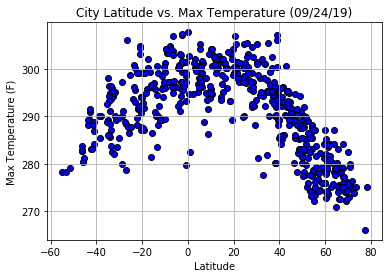

<Figure size 432x288 with 0 Axes>

In [10]:
weather.dtypes
weather.convert_objects(convert_numeric=True).dtypes

plt.scatter(weather["Lat"], weather["Max Temp"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Max Temperature (09/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()
plt.savefig("LatvsTemp.png")

#### Latitude vs. Humidity Plot

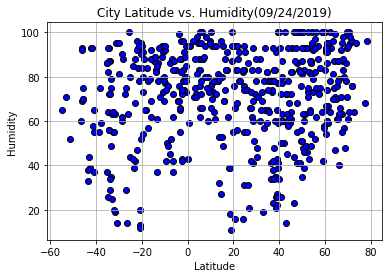

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(weather["Lat"], weather["Humidity"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Humidity(09/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Humidity.png")
plt.show()
plt.savefig("LatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

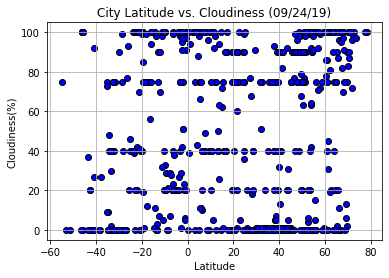

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(weather["Lat"], weather["Cloudiness"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Cloudiness (09/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()
plt.savefig("LatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

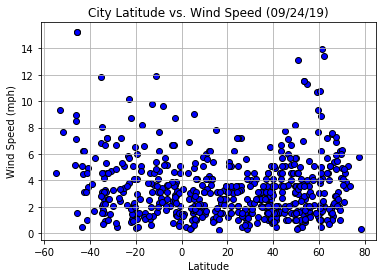

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(weather["Lat"], weather["Wind Speed"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Wind Speed (09/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()
plt.savefig("LatvsWindSpeed.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression